In [1]:
import numpy as np
import sklearn
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

MergeListe = []

%matplotlib inline
#Noch offene Todos
    #Fehlerwerte definieren
    #variable als input string?
    #nochmal überprüfen, ob die richtigen Tabellen benutzt wurden
    #überprüfen ob daten bei regen stimmen können, da sehr oft 0.0
    #Regressionsanalyse? Sinnvoll?

In [2]:
#Read air temperature data; Temperature in °C and rename column 
#only keep relevant time frame
#put pd into a Merge List

# ns all datasets need to be stored in same repository as this notebook

Temp_Dataset = pd.read_csv("Temperatur_tu_stunde_19810101_20181231_01420.txt", 
                header = 0,
                #index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_9",
                        "Temperature",
                        "RelativeAirHumidity",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","Temperature","RelativeAirHumidity"])
#ns slicing only the relevant timeframe out of "DateTime"
Temp_Dataset = Temp_Dataset[Temp_Dataset["DateTime"] >= 2015050100]
Temp_Dataset = Temp_Dataset[Temp_Dataset["DateTime"] <2017010100]

#ns adding a field to format the date out of the numbers that are stored in "DateTime"

Temp_Dataset["FormattedDate"]= pd.to_datetime(Temp_Dataset['DateTime'], format='%Y%m%d%H')

#ns using "DateTime" as the new index
Ind_Dataset = Temp_Dataset.set_index(["DateTime"])
print(Ind_Dataset)
#print(Temp_Dataset)
MergeListe.append(Ind_Dataset)

            Temperature  RelativeAirHumidity       FormattedDate
DateTime                                                        
2015050100          8.0                 95.0 2015-05-01 00:00:00
2015050101          7.8                 95.0 2015-05-01 01:00:00
2015050102          7.7                 97.0 2015-05-01 02:00:00
2015050103          7.2                 97.0 2015-05-01 03:00:00
2015050104          6.0                 98.0 2015-05-01 04:00:00
...                 ...                  ...                 ...
2016123119         -3.6                 99.0 2016-12-31 19:00:00
2016123120         -3.5                 99.0 2016-12-31 20:00:00
2016123121         -3.7                 98.0 2016-12-31 21:00:00
2016123122         -3.7                 99.0 2016-12-31 22:00:00
2016123123         -3.9                 99.0 2016-12-31 23:00:00

[14664 rows x 3 columns]


In [3]:
#Notiz: ich würde eigentlich gerne alles mit Schleifen machen lassen. 
#Also alle wichtigen Dateien in einem Ordner haben und das ganze dann durchiterieren. 
#Je nach Zeitaufwand und Lust könnte ich es ja mal versuchen 

In [4]:
#Read Data for SunshineDuration
#in min per hour 
#Same procedure as before 

Sun_Dataset = pd.read_csv("sonne_sd_stunde_19510101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_7",
                        "SunshineDuration",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","SunshineDuration"])
Sun_Dataset = Sun_Dataset[Sun_Dataset.index>= 2015050100]
Sun_Dataset = Sun_Dataset[Sun_Dataset.index <2017010100]
print(Sun_Dataset)
MergeListe.append(Sun_Dataset)

            SunshineDuration
DateTime                    
2015050103               0.0
2015050104               0.0
2015050105               0.0
2015050106               0.0
2015050107               1.0
...                      ...
2016123116               0.0
2016123117               0.0
2016123118               0.0
2016123119               0.0
2016123120               0.0

[10998 rows x 1 columns]


In [5]:
#Read cloudiness Data 
#Cloudiness ranked from 0 to 8; -1 for the case, that sky could not bee seen
#Same procedure as before

Cloud_Dataset = pd.read_csv("Cloudiness_n_stunde_19490101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "IndexHowMeasurementIsTaken",
                        "TotalCloudCover",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","TotalCloudCover"])
Cloud_Dataset = Cloud_Dataset[Cloud_Dataset.index>= 2015050100]
Cloud_Dataset = Cloud_Dataset[Cloud_Dataset.index <2017010100]
print(Cloud_Dataset)
MergeListe.append(Cloud_Dataset)

            TotalCloudCover
DateTime                   
2015050100                7
2015050101                8
2015050102                7
2015050103                6
2015050104                6
...                     ...
2016123119                8
2016123120                8
2016123121                8
2016123122                8
2016123123                8

[14664 rows x 1 columns]


In [6]:
#Notiz: Es gibt noch Infos über die Niederschlagsform, allerdngs relativ komplex. Wollen wir diese mit reinnehmen oder nicht?
# Hier sind ist die Form erstmal außen vor gelassen

In [7]:
#Read Data for Precipitation
#in mm per hour 
#Same procedure as before 
Precipitation_Dataset = pd.read_csv("Niederschlag_rr_stunde_19950901_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "PrecipitationHeight",
                        "PrecipitationBool",
                        "FormOfPrecipitation",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","PrecipitationHeight"])
Precipitation_Dataset = Precipitation_Dataset[Precipitation_Dataset.index>= 2015050100]
Precipitation_Dataset = Precipitation_Dataset[Precipitation_Dataset.index <2017010100]
print(Precipitation_Dataset)
MergeListe.append(Precipitation_Dataset)

            PrecipitationHeight
DateTime                       
2015050100                  0.0
2015050101                  0.0
2015050102                  0.0
2015050103                  0.0
2015050104                  0.0
...                         ...
2016123119                  0.0
2016123120                  0.0
2016123121                  0.0
2016123122                  0.0
2016123123                  0.0

[14656 rows x 1 columns]


In [8]:
#Reading visibility Data
# in meters
# same as before
Visibility_Dataset = pd.read_csv("Sicht_vv_stunde_19490101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "IndexHowMeasurementIsTaken",
                        "Visibility",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","Visibility"])
Visibility_Dataset = Visibility_Dataset[Visibility_Dataset.index>= 2015050100]
Visibility_Dataset = Visibility_Dataset[Visibility_Dataset.index <2017010100]
print(Visibility_Dataset)
MergeListe.append(Visibility_Dataset)

            Visibility
DateTime              
2015050100       30000
2015050101       30000
2015050102       35000
2015050103       35000
2015050104       30000
...                ...
2016123119        2600
2016123120        1900
2016123121        1900
2016123122        1900
2016123123        1900

[14664 rows x 1 columns]


In [9]:
#Read wind Data
#In m/s
#same procedure as before 
Wind_Dataset = pd.read_csv("Wind_ff_stunde_19670101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_3",
                        "MeanWindSpeed",
                        "MeanWindDirection",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","MeanWindSpeed"])
Wind_Dataset = Wind_Dataset[Wind_Dataset.index>= 2015050100]
Wind_Dataset = Wind_Dataset[Wind_Dataset.index <2017010100]
print(Wind_Dataset)
MergeListe.append(Wind_Dataset)

            MeanWindSpeed
DateTime                 
2015050100            2.2
2015050101            2.2
2015050102            1.5
2015050103            1.5
2015050104            0.6
...                   ...
2016123119            1.9
2016123120            1.7
2016123121            1.7
2016123122            2.1
2016123123            1.5

[14664 rows x 1 columns]


In [10]:
#joining all existing data frames to one by using the index 
#-> problem: the dataframes are stored as List elements
#Wetterdaten as panda
#for Datensatz in MergeListe:
#    Wetterdaten = Wetterdaten.merge(Datensatz, left_index=True, right_index=True)
#print(Wetterdaten)  
#Wetterdaten = MergeListe
#Wetterdaten[0].merge(Wetterdaten[1:])

# Merge two or more Dataframes on index of both the dataframes
Wetterdaten = pd.concat(MergeListe, axis=1)
print(Wetterdaten)
Wetterdaten.describe()

            Temperature  RelativeAirHumidity       FormattedDate  \
DateTime                                                           
2015050100          8.0                 95.0 2015-05-01 00:00:00   
2015050101          7.8                 95.0 2015-05-01 01:00:00   
2015050102          7.7                 97.0 2015-05-01 02:00:00   
2015050103          7.2                 97.0 2015-05-01 03:00:00   
2015050104          6.0                 98.0 2015-05-01 04:00:00   
...                 ...                  ...                 ...   
2016123119         -3.6                 99.0 2016-12-31 19:00:00   
2016123120         -3.5                 99.0 2016-12-31 20:00:00   
2016123121         -3.7                 98.0 2016-12-31 21:00:00   
2016123122         -3.7                 99.0 2016-12-31 22:00:00   
2016123123         -3.9                 99.0 2016-12-31 23:00:00   

            SunshineDuration  TotalCloudCover  PrecipitationHeight  \
DateTime                                     

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
count,14664.000000,14664.000000,10998.000000,14664.000000,14656.000000,14664.000000,14664.000000
mean,12.487786,74.610406,15.140389,5.371522,-0.684498,34807.950764,3.336675
std,7.798837,19.621688,22.833367,2.608460,27.365011,18527.366064,2.049207
min,-7.200000,16.000000,0.000000,-1.000000,-999.000000,100.000000,0.000000
25%,6.400000,61.000000,0.000000,3.000000,0.000000,18000.000000,1.800000
50%,12.200000,78.000000,0.000000,7.000000,0.000000,35000.000000,2.900000
75%,17.900000,92.000000,29.000000,7.000000,0.000000,50000.000000,4.400000
max,38.100000,100.000000,60.000000,8.000000,19.100000,81900.000000,14.600000


In [11]:
"""ns handling error values

Assigning numerical error values to 'nan' so that statistical methods are not biased"""

#ns Temperature Error values are -999
#ns relative Air humidity error values are -999
#ns sunshine duration error values are -999
#ns totalcloudcover error values are -999
#ns precipitationheight error values are -999
#ns visibility error values are -999
#ns meanwindspeed error values are not existent

#ns therefore all -999 in the dataframe are replaced by nan
#ns only PrecipitationHeight has error values
#ns create new dataframe to keep original active and have the new one anyway

Wetterdaten_nand = Wetterdaten.replace(-999,np.NaN)

#ns option to overwrite dataframe or not
Wetterdaten = Wetterdaten_nand


In [12]:
Wetterdaten.describe()

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
count,14664.000000,14664.000000,10998.000000,14664.000000,14645.000000,14664.000000,14664.000000
mean,12.487786,74.610406,15.140389,5.371522,0.065347,34807.950764,3.336675
std,7.798837,19.621688,22.833367,2.608460,0.460074,18527.366064,2.049207
min,-7.200000,16.000000,0.000000,-1.000000,0.000000,100.000000,0.000000
25%,6.400000,61.000000,0.000000,3.000000,0.000000,18000.000000,1.800000
50%,12.200000,78.000000,0.000000,7.000000,0.000000,35000.000000,2.900000
75%,17.900000,92.000000,29.000000,7.000000,0.000000,50000.000000,4.400000
max,38.100000,100.000000,60.000000,8.000000,19.100000,81900.000000,14.600000


In [34]:
"""ns clean weather data

Description above shows, that only sunshine and precipitation values are missing. Precipitation is only missing 19 values, these will be filled via forward fill, because the missing values are < 0.2% and we assume some weather stability, rather than to assume 0 or mean values.

SunshineDuration is always missing 6h from 9 pm until 3 am. Will be imputed with zeros, because the sun typically does not shine at night in Frankfurt."""

Wetterdaten['PrecipitationHeight'].fillna(method='ffill', inplace=True)

Wetterdaten['SunshineDuration'].fillna(0, inplace=True)

Wetterdaten.describe()

Wetterdaten.iloc[1224:1260]
Wetterdaten.iloc[9000:9049]

,Temperature,RelativeAirHumidity,FormattedDate,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
DateTime,,,,,,,,
2016051000,17.7,49.0,2016-05-10 00:00:00,0.0,6,0.0,50000,2.3
2016051001,17.3,51.0,2016-05-10 01:00:00,0.0,4,0.0,50000,2.7
2016051002,17.1,51.0,2016-05-10 02:00:00,0.0,7,0.0,50000,2.9
2016051003,16.9,52.0,2016-05-10 03:00:00,0.0,7,0.0,50000,2.2
2016051004,16.9,52.0,2016-05-10 04:00:00,0.0,7,0.0,50000,2.4
2016051005,17.3,51.0,2016-05-10 05:00:00,0.0,7,0.0,50000,2.6
2016051006,17.8,51.0,2016-05-10 06:00:00,0.0,7,0.0,55000,2.1
2016051007,18.7,45.0,2016-05-10 07:00:00,33.0,7,0.0,55000,2.4
2016051008,19.7,45.0,2016-05-10 08:00:00,37.0,7,0.0,50000,2.5


In [14]:
#ns Choosing the formatted date as the new index
Ind_Wetterdaten = Wetterdaten.set_index(['FormattedDate'])
Ind_Wetterdaten.head()

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
FormattedDate,,,,,,,
2015-05-01 00:00:00,8.0,95.0,NaN,7,0.0,30000,2.2
2015-05-01 01:00:00,7.8,95.0,NaN,8,0.0,30000,2.2
2015-05-01 02:00:00,7.7,97.0,NaN,7,0.0,35000,1.5
2015-05-01 03:00:00,7.2,97.0,0.0,6,0.0,35000,1.5
2015-05-01 04:00:00,6.0,98.0,0.0,6,0.0,30000,0.6


C:\Users\nickl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


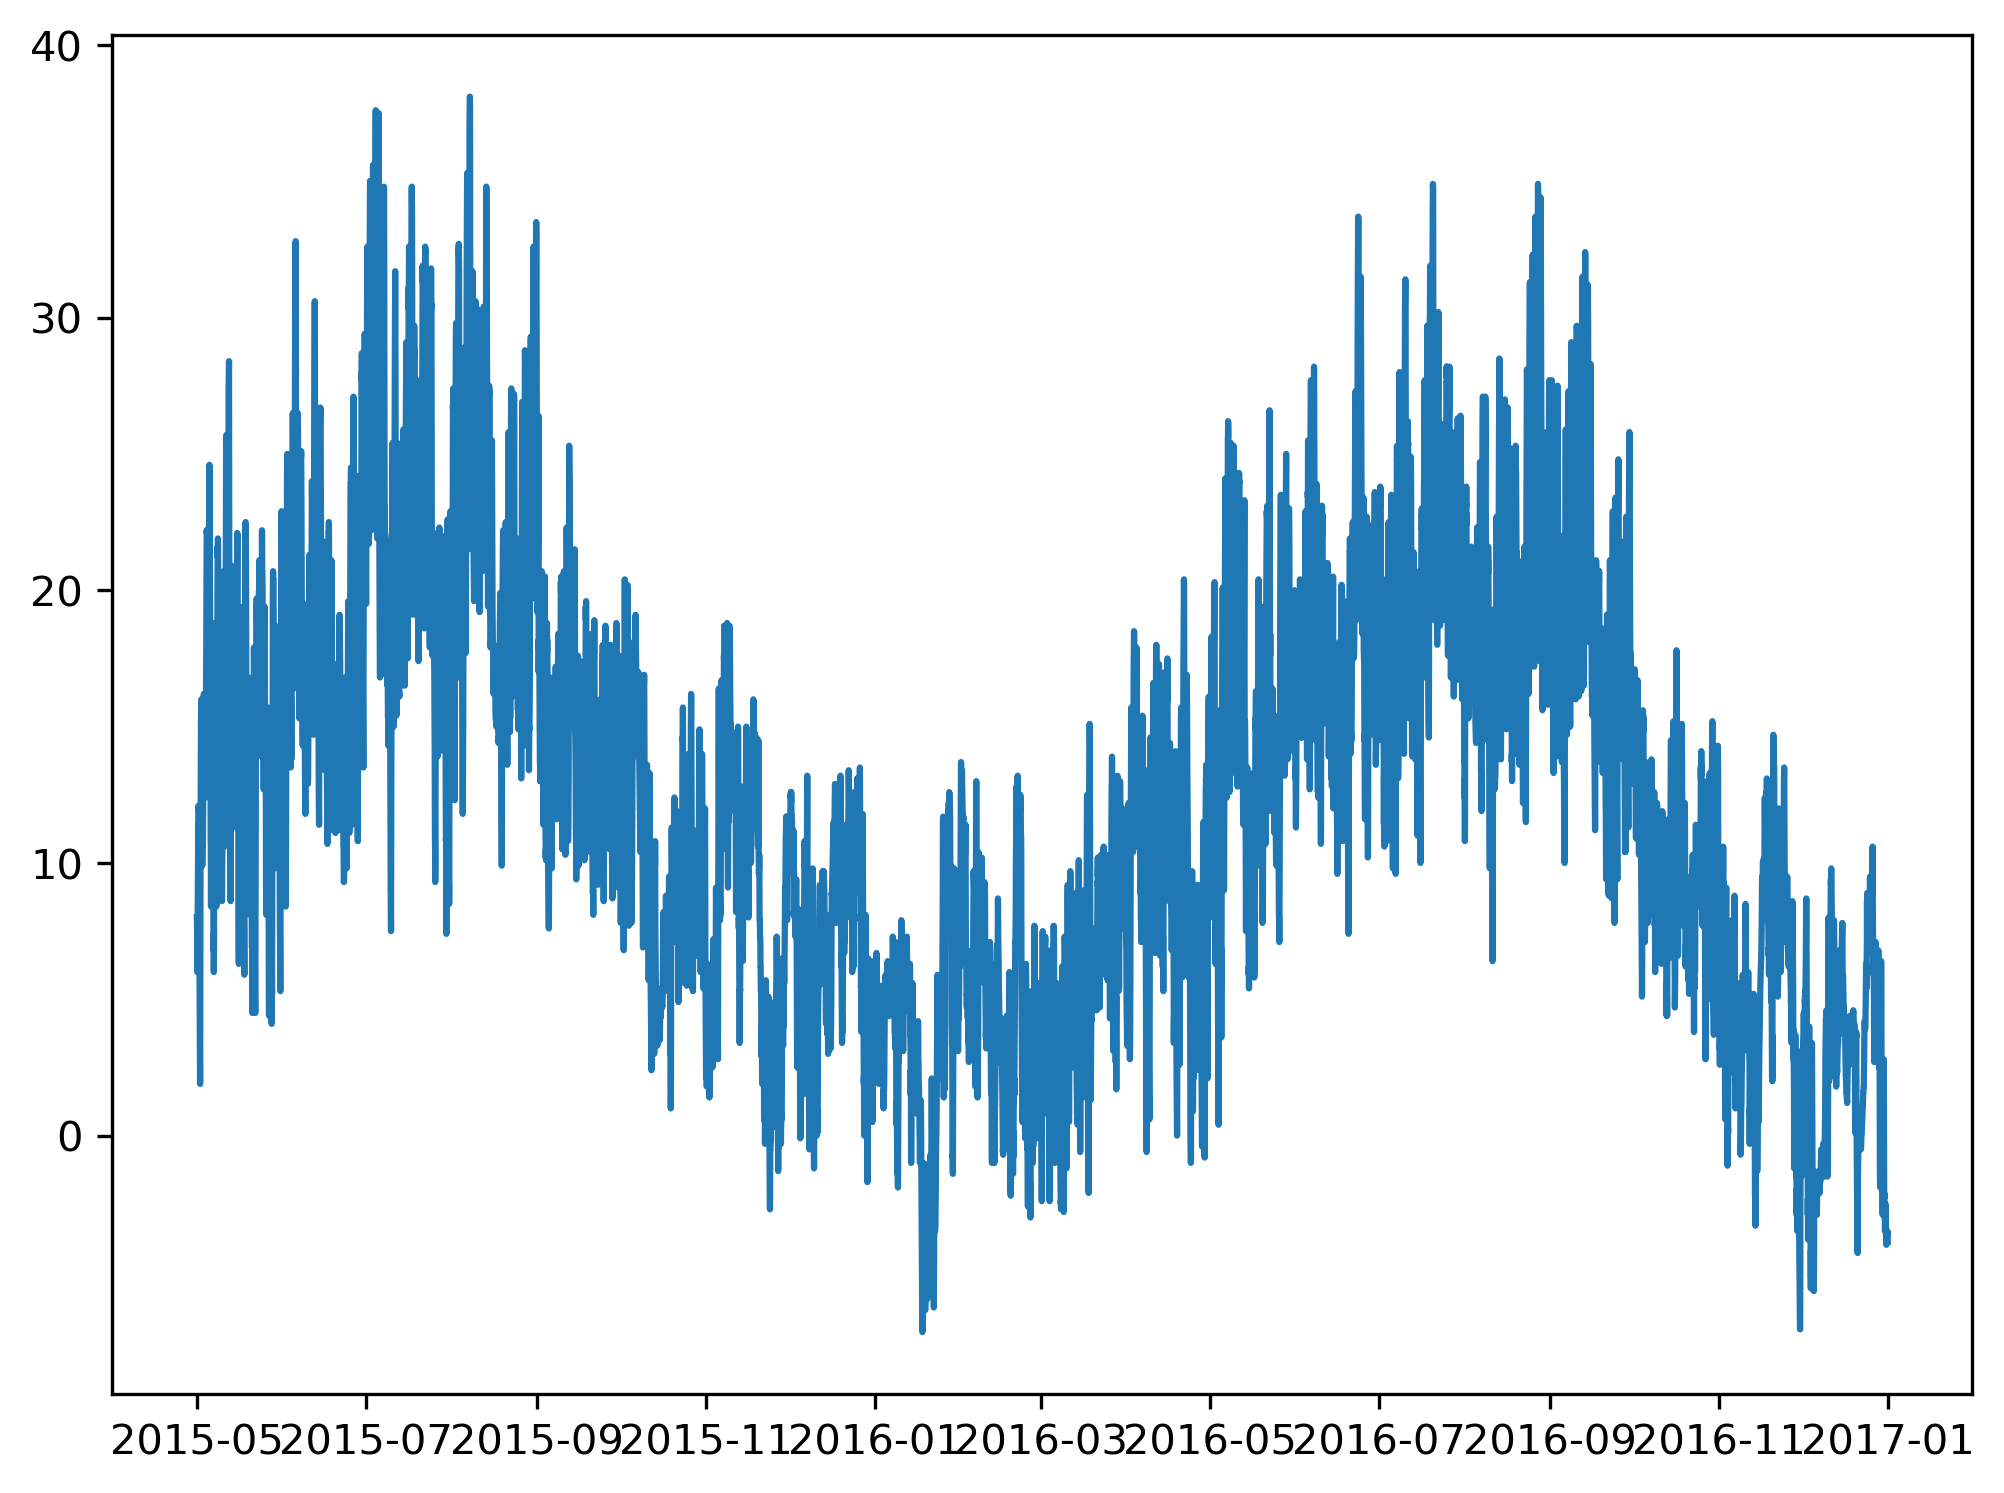

In [15]:
"""ns data visualization for data understanding purposes"""

Fig_1 = plt.figure(figsize=(8,6),dpi = 300)
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['Temperature'])
plt.show()

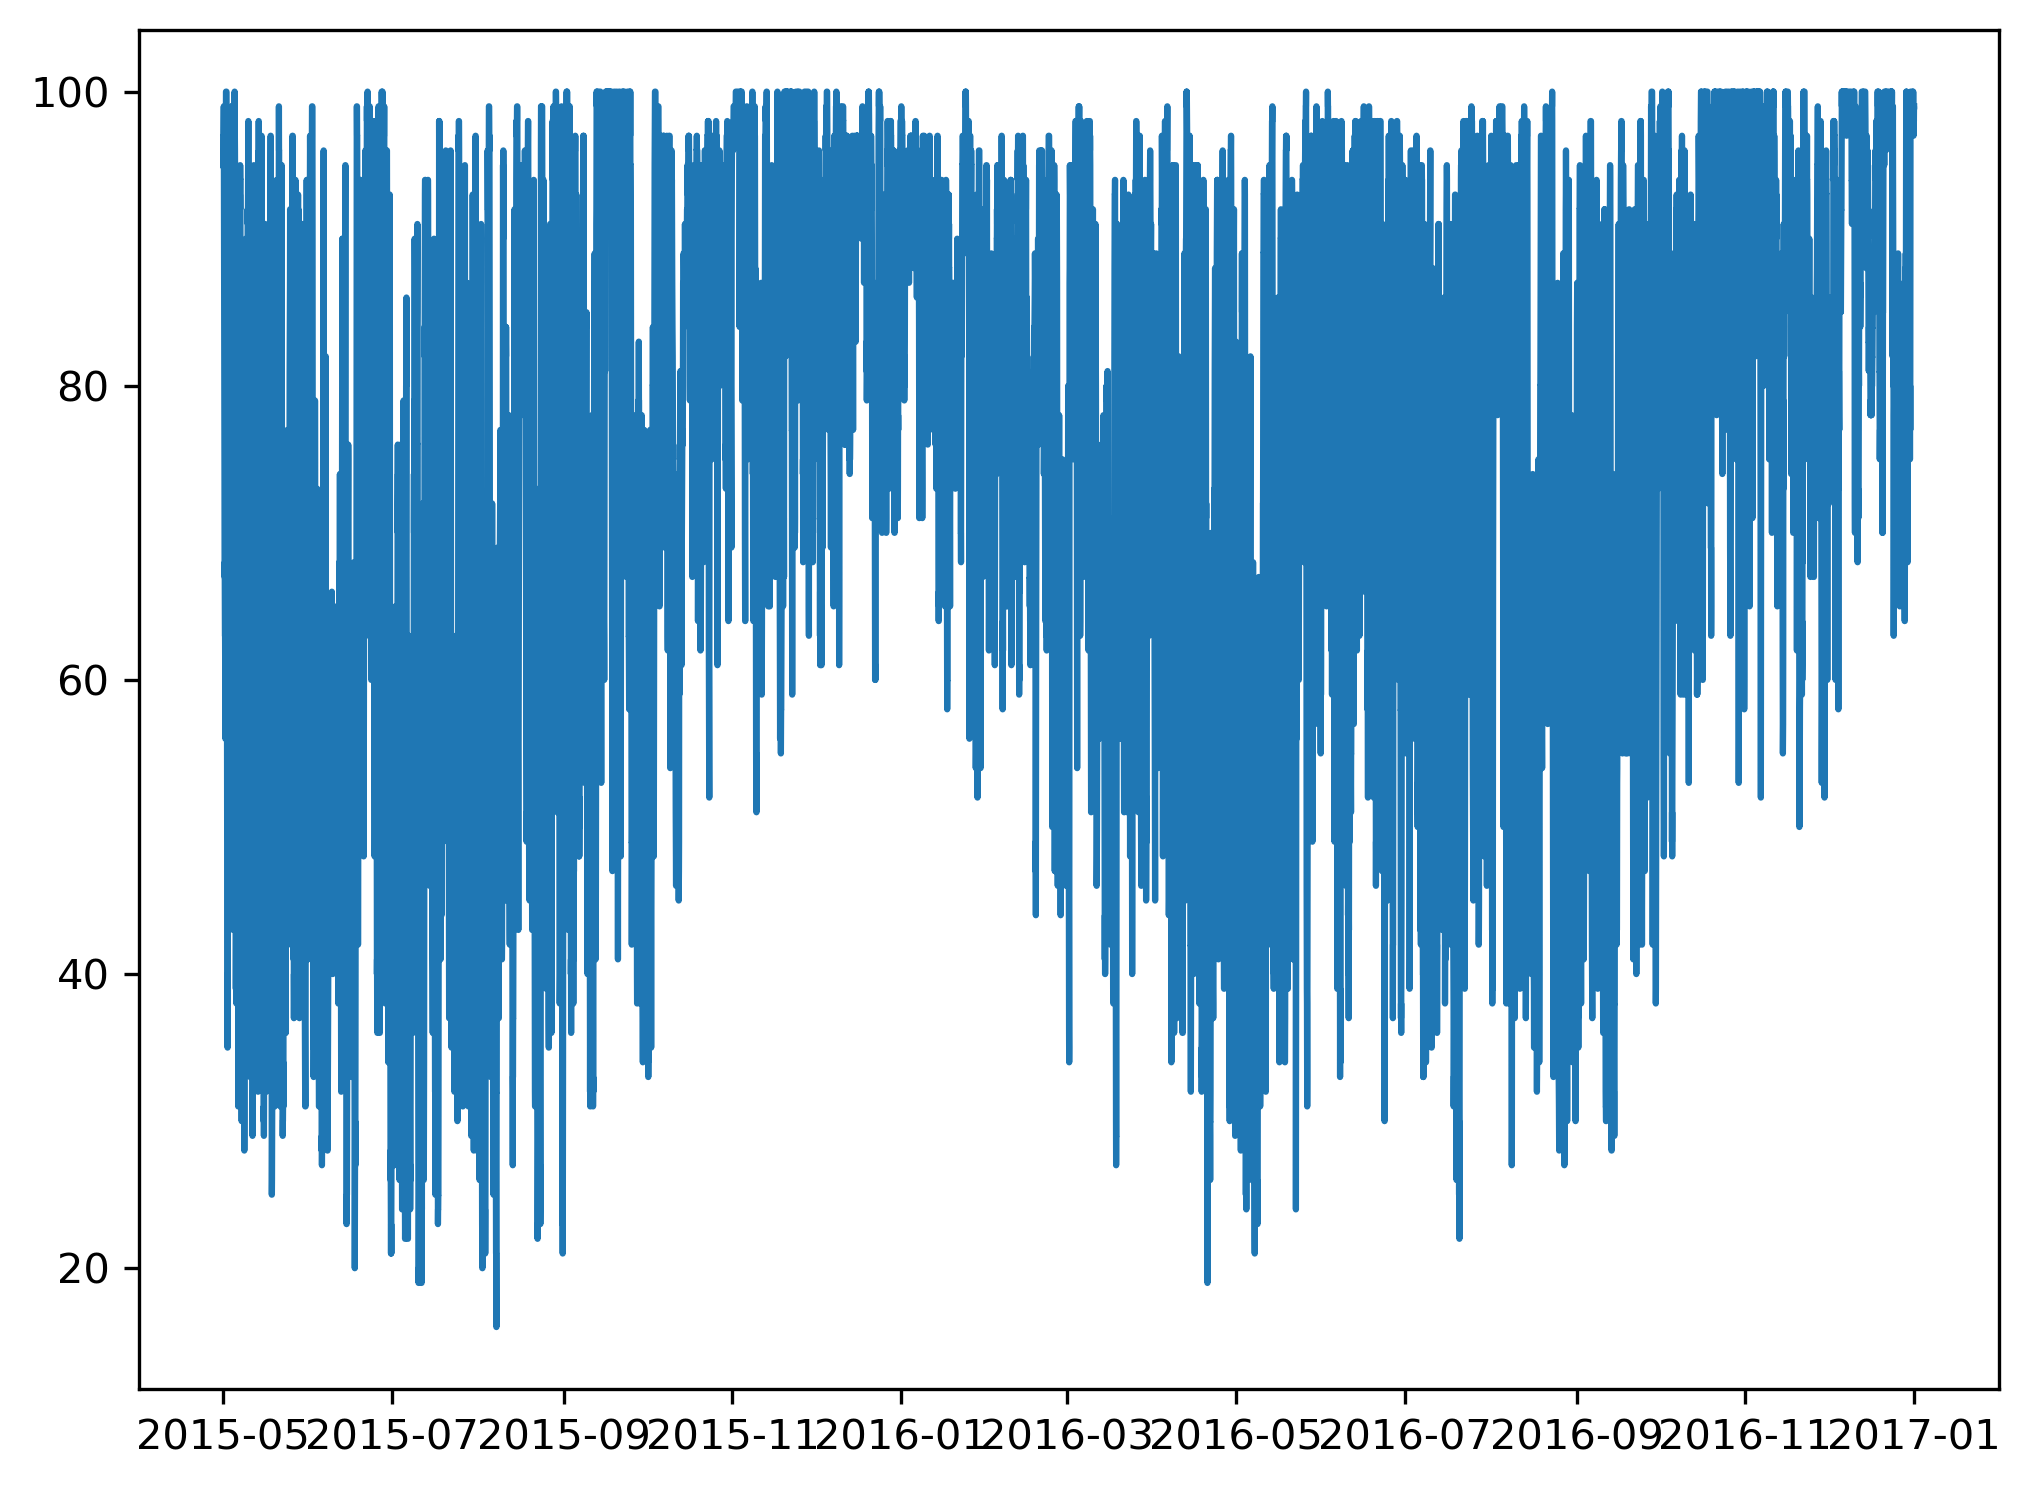

In [16]:
Fig_2 = plt.figure(figsize=(8,6),dpi = 300)
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['RelativeAirHumidity'])
plt.show()

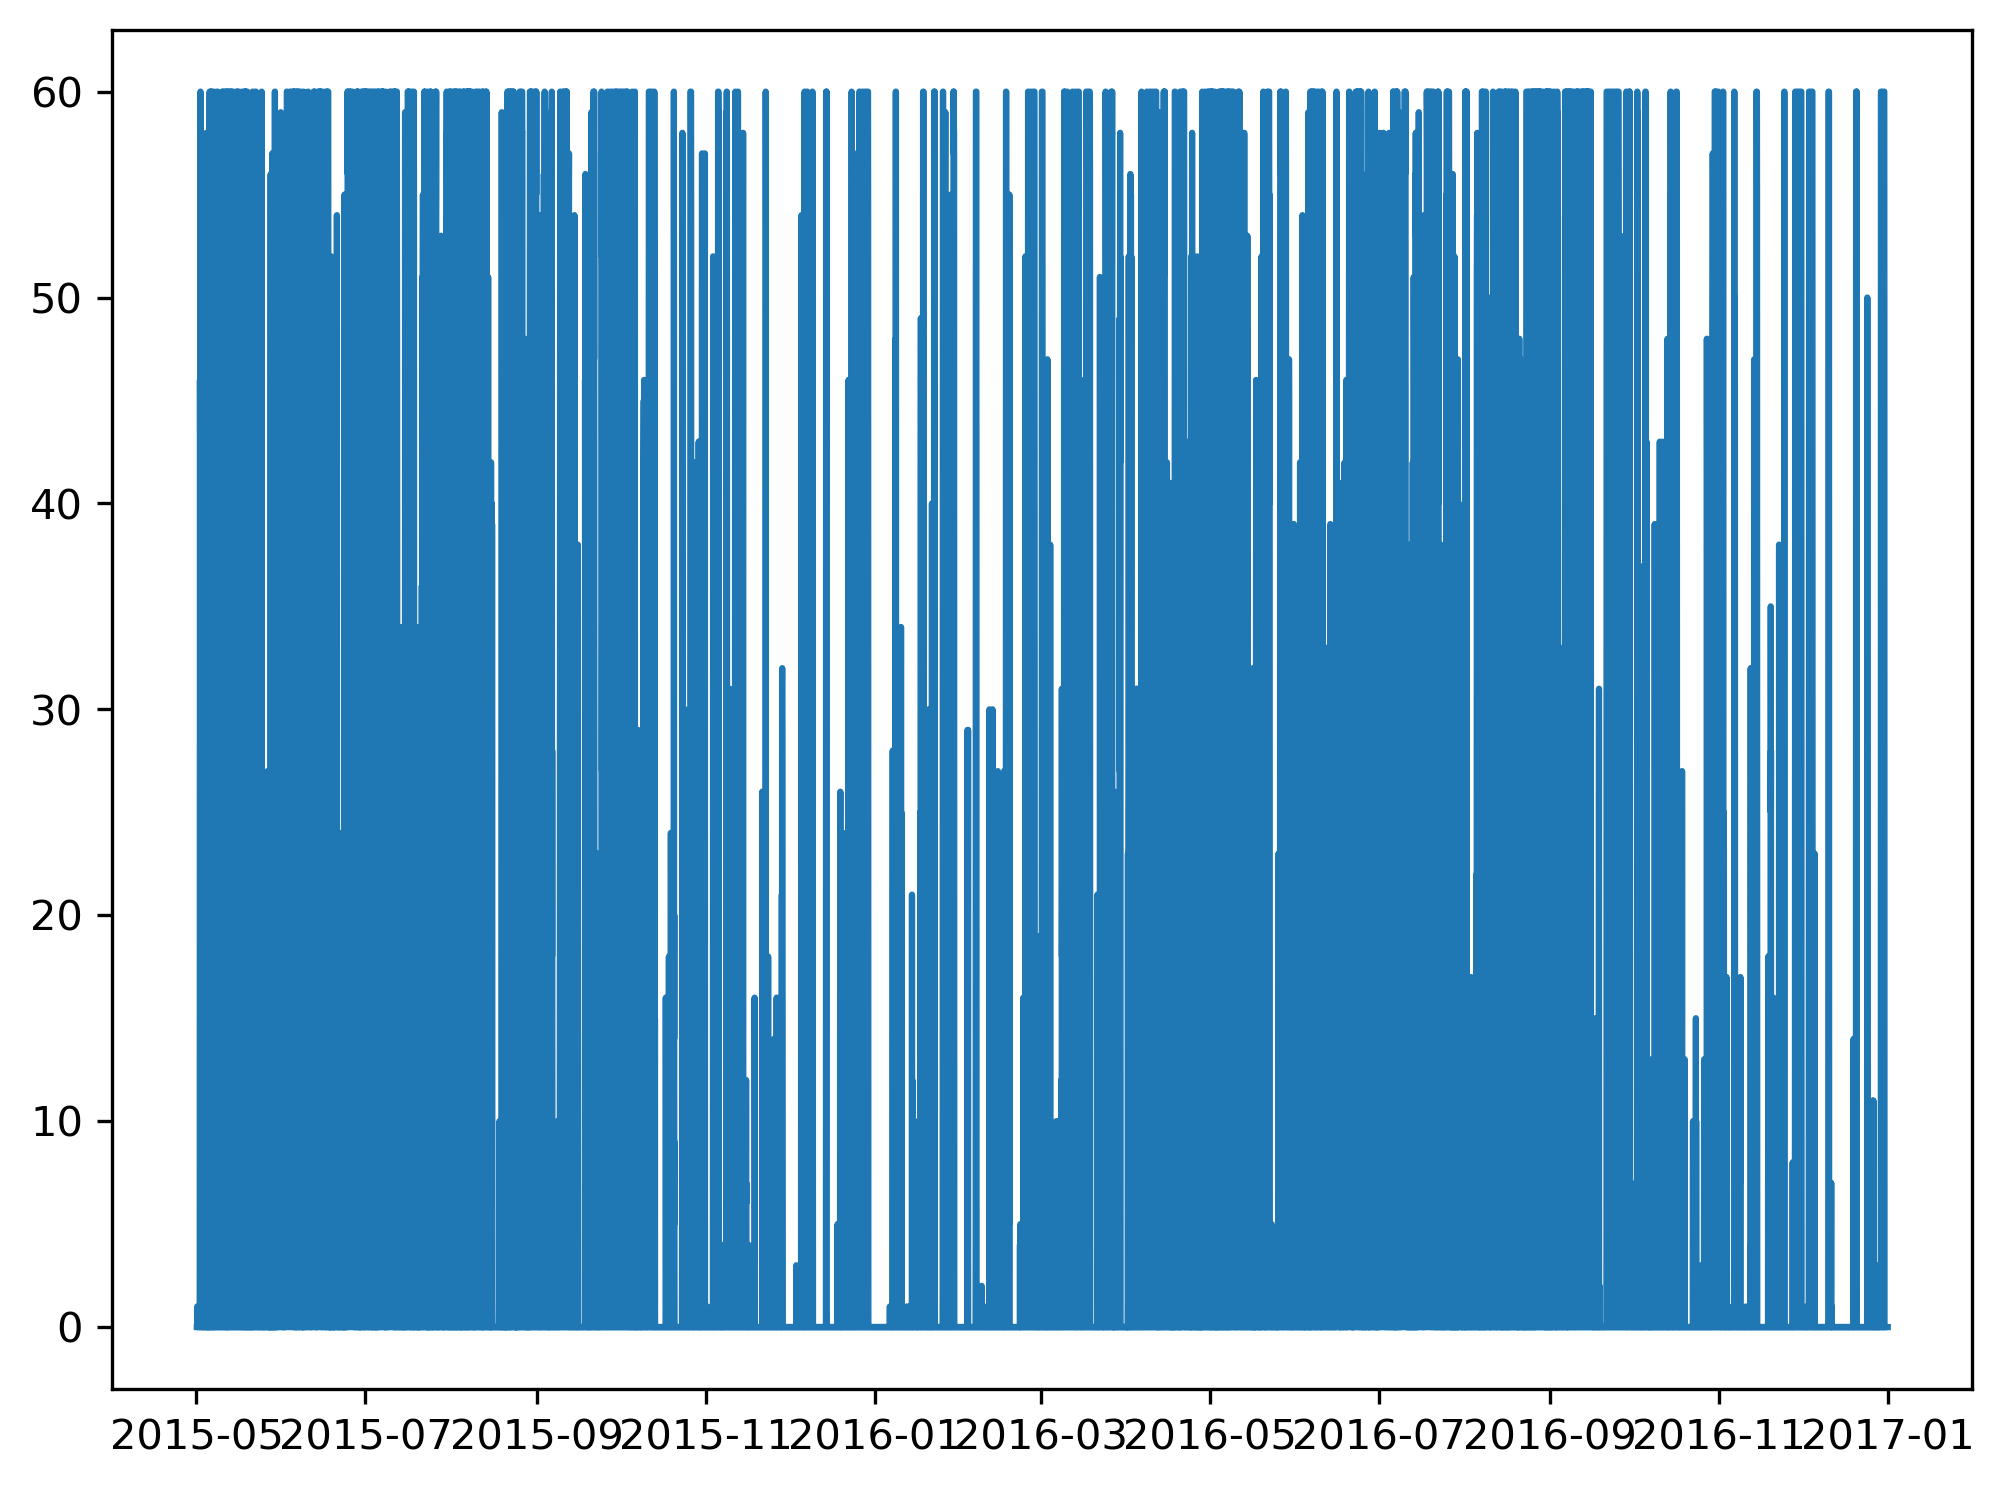

In [17]:
Fig_3 = plt.figure(figsize=(8,6),dpi = 300)
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['SunshineDuration'])
plt.show()

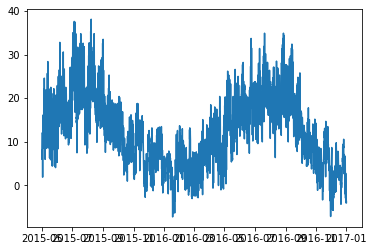

In [18]:
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['Temperature'])
plt.show()

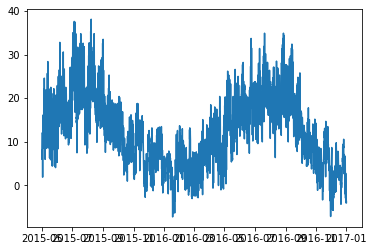

In [19]:
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['Temperature'])
plt.show()

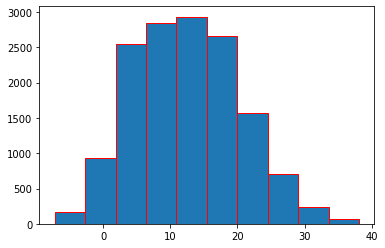

In [20]:
plt.hist(Ind_Wetterdaten['Temperature'], bins=10, edgecolor='red')
plt.show()

In [21]:
tempSun = r2_score(Ind_Wetterdaten['Temperature'],Ind_Wetterdaten['SunshineDuration'])
print(tempSun)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').